# Scenario with building limiting the view

In [27]:
import sys  
sys.path.insert(0, 'python/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulation import step_simulation
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation

### Plot function used for the visualizations

In [36]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(-70,70)
    plt.ylim(-10,130)

### Import the scenario

In [29]:
# with open("scenario_building/config_recreated.yaml") as file:
#     config = yaml.load(file, Loader=yaml.FullLoader)
# scenario1, _ = CommonRoadFileReader("scenario_building/DEU_Ffb-1_4_recreation.xml").open()
# scenario2, _ = CommonRoadFileReader("scenario_building/DEU_Ffb-1_4_recreation.xml").open()

# with open("scenarios/config_recreated.yaml") as file:
#     config = yaml.load(file, Loader=yaml.FullLoader)
# scenario1, _ = CommonRoadFileReader("scenarios/ZAM_Merge-1_1_T-1.xml").open()
# scenario2, _ = CommonRoadFileReader("scenarios/ZAM_Merge-1_1_T-1.xml").open()

with open("scenarios/config_recreated.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
scenario1, _ = CommonRoadFileReader("scenarios/Test.xml").open()
scenario2, _ = CommonRoadFileReader("scenarios/Test.xml").open()

### Simulations (It will take some time)

In [30]:
config['occlusion_params']['velocity_tracking_enabled'] = True
track_vehicle, tracked_scenarios, tracked_views, tracked_shadows = step_simulation(scenario1, config)

config['occlusion_params']['velocity_tracking_enabled'] = False
no_track_vehicle, not_tracked_scenarios, not_tracked_views, not_tracked_shadows = step_simulation(scenario2, config)

Running simulation: 100%|██████████| 100/100 [04:40<00:00,  2.80s/it]


### Plots

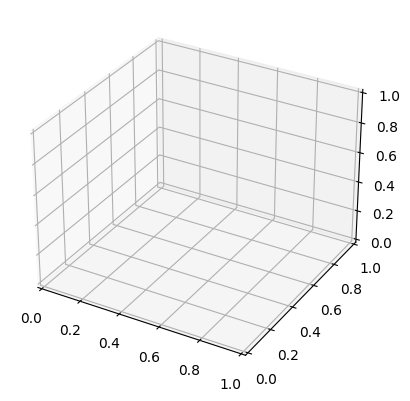

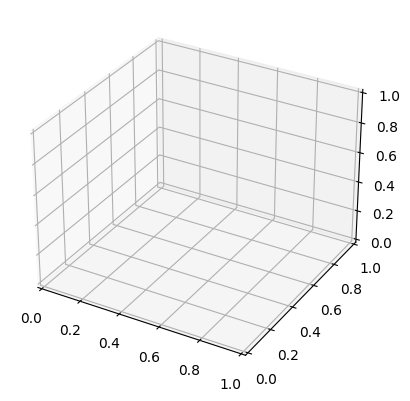

In [31]:
for shadow in tracked_shadows:
    Visualizer().plot_3D_shadows(shadow, 15,3)

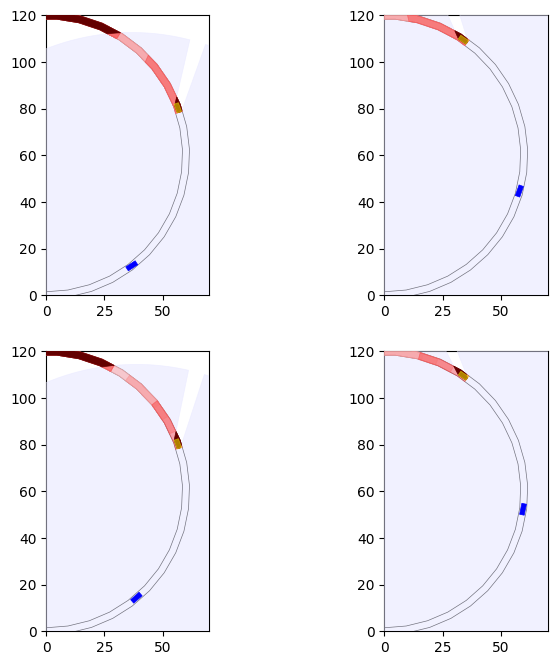

In [32]:
t1 = 15
t2 = 30
fig, ax = plt.subplots(2, 2, figsize=(20,13))
plt.sca(ax[0][0])
plot(t1, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[0][1])
plot(t2, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[1][0])
plot(t1, track_vehicle, tracked_scenarios, tracked_views)
plt.sca(ax[1][1])
plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the proposed method

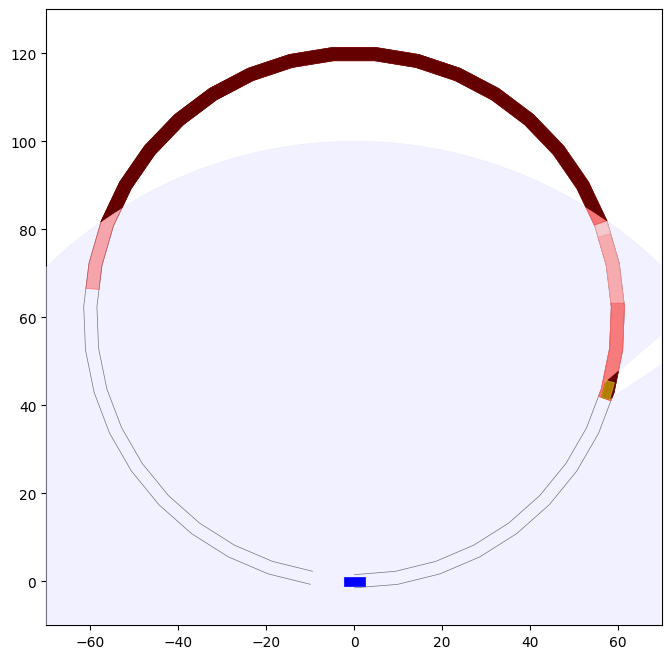

In [37]:
from IPython.display import HTML

fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Velocity comparison

Text(0, 0.5, 'RSS distance [m]')

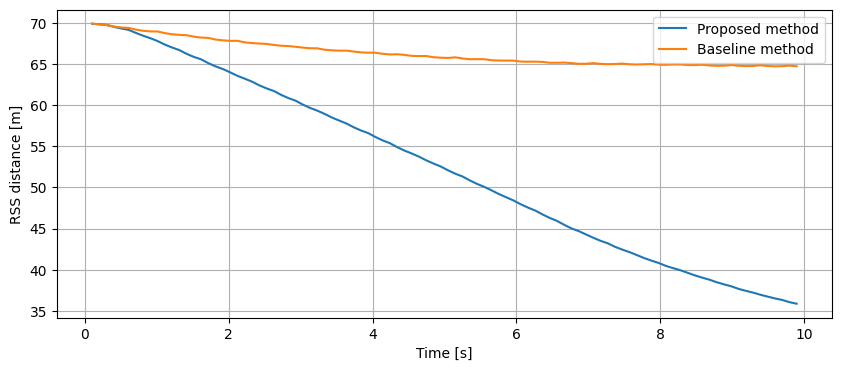

In [34]:
from utilities import find_RSS_distance
import numpy as np

dists_track = find_RSS_distance(track_vehicle, scenario1, config)
dists_no_track = find_RSS_distance(no_track_vehicle, scenario2, config)
time = np.linspace(0.1, config.get('simulation_duration')/10, config.get('simulation_duration')-1) #assuming dt = 0.1

plt.figure(figsize=(10,4))
labels = ['Proposed method','Baseline method']

plt.plot(time, dists_track, label=labels[0])
plt.plot(time, dists_no_track, label=labels[1])
plt.legend()
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('RSS distance [m]')

(22.0, 32.0)

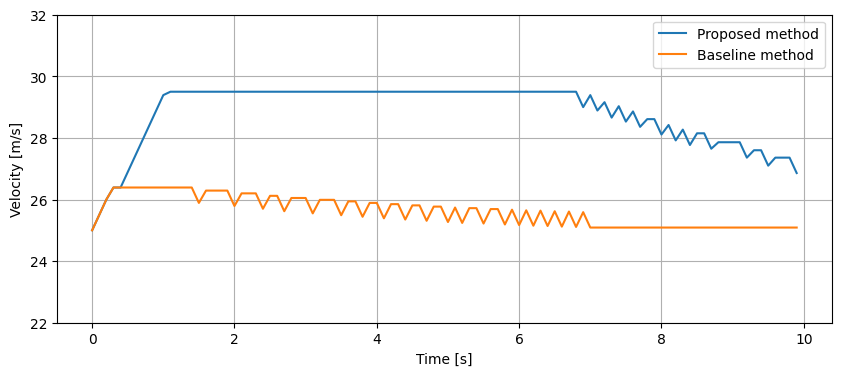

In [35]:
plt.figure(figsize=(10, 4))
labels = ['Proposed method','Baseline method']
for idx, vehicle in enumerate([track_vehicle, no_track_vehicle]):
    velocities = [round(vehicle.initial_state.velocity, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid()
plt.ylim(22, 32)